In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('titanic_train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


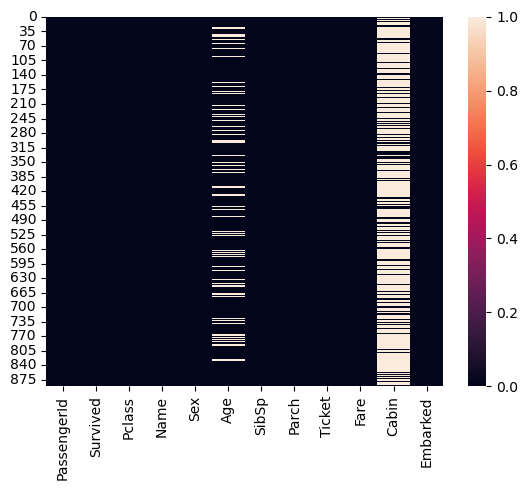

In [4]:
sns.heatmap(df.isna())
plt.show()

In [5]:
df.isna().sum()/len(df)*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

<Axes: ylabel='Frequency'>

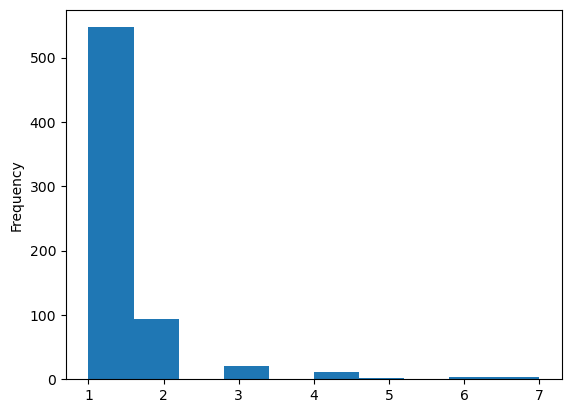

In [6]:
df.Ticket.value_counts().plot(kind = 'hist')

In [7]:
df.drop('Cabin PassengerId Ticket'.split(), axis = 1, inplace = True)
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


<Axes: xlabel='Age', ylabel='Count'>

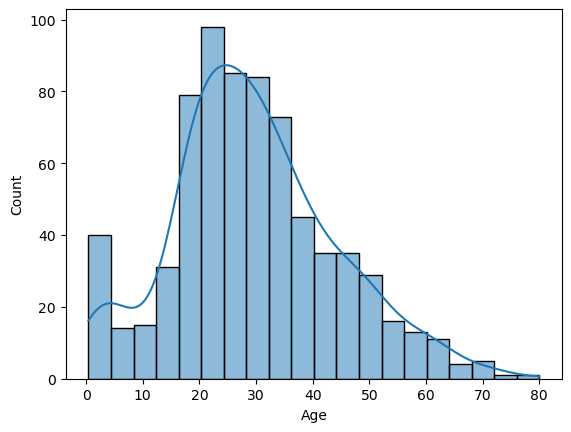

In [8]:
sns.histplot(df.Age, kde=True)

In [9]:
import pingouin as pg

<Axes: xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

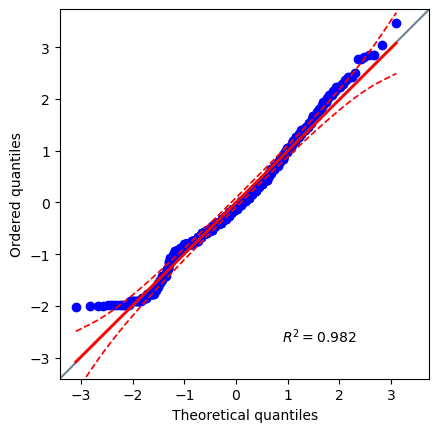

In [11]:
pg.qqplot(df.Age)

In [12]:
df.Embarked.value_counts(dropna=False)

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

In [13]:
df[df.Embarked.isna() == True]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
61,1,1,"Icard, Miss. Amelie",female,38.0,0,0,80.0,NaN
829,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,80.0,NaN


In [14]:
df.Fare.value_counts()

Fare
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
35.0000     1
28.5000     1
6.2375      1
14.0000     1
10.5167     1
Name: count, Length: 248, dtype: int64

<Axes: xlabel='Fare', ylabel='Count'>

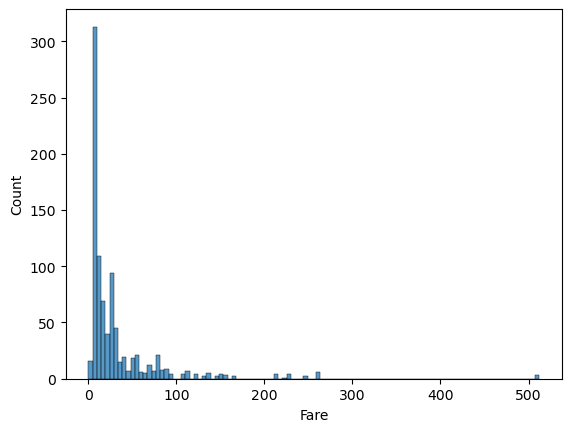

In [15]:
sns.histplot(df.Fare)

In [16]:
df.columns = df.columns.str.lower()
df.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked'],
      dtype='object')

In [17]:
pd.crosstab(index = df.embarked, columns = df.pclass, aggfunc = np.median, values = df.fare)

pclass,1,2,3
embarked,,,
C,78.2667,24.00,7.8958
Q,90.0000,12.35,7.7500
S,52.0000,13.50,8.0500


In [18]:
pd.crosstab(index = df.embarked, columns = df.sex)

sex,female,male
embarked,,
C,73,95
Q,36,41
S,203,441


age akan diisi dengan mean, embarked akan diisi dengan S

## Clean Data

In [30]:
df['title'] = df['name'].str.split(',').str[1].str.split('.').str[0]
df

,survived,pclass,name,sex,age,sibsp,parch,fare,embarked,title
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Mrs
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Mrs
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S,Rev
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S,Miss
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,23.4500,S,Miss
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C,Mr


In [35]:
df.title.unique()

array([' Mr', ' Mrs', ' Miss', ' Master', ' Don', ' Rev', ' Dr', ' Mme',
       ' Ms', ' Major', ' Lady', ' Sir', ' Mlle', ' Col', ' Capt',
       ' the Countess', ' Jonkheer'], dtype=object)

In [36]:
df.drop(columns = ['name'], inplace = True)

# EDA

survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64

<Axes: ylabel='proportion'>

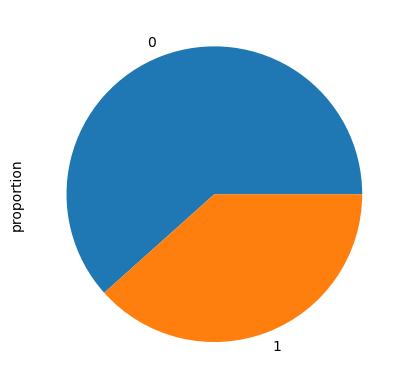

In [42]:
display(df.survived.value_counts(normalize = True)*100)
df.survived.value_counts(normalize = True).plot(kind = 'pie')

## Survived and Fare

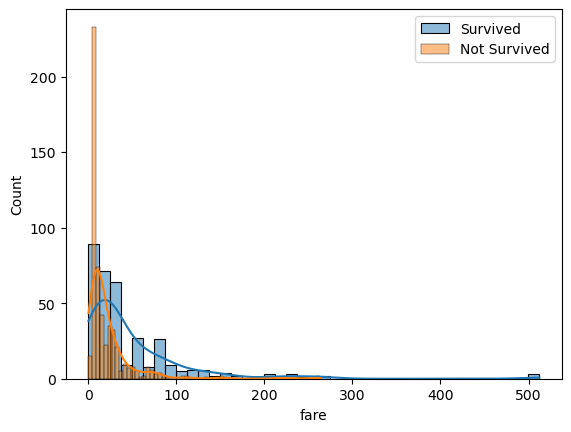

In [48]:
sns.histplot(df[df.survived == 1]['fare'], label = 'Survived', kde=True)
sns.histplot(df[df.survived == 0]['fare'], label = 'Not Survived', kde=True)
plt.legend()

## Survived and Sex

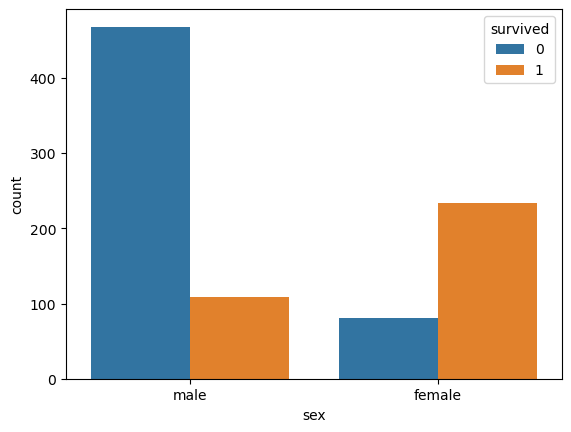

In [50]:
sns.countplot(x = 'sex', hue='survived', data = df)
plt.show()

In [54]:
pd.crosstab(index = df.sex, columns = df.survived, normalize = 'index')

survived,0,1
sex,,
female,0.257962,0.742038
male,0.811092,0.188908


C:\Users\Chopper\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 56.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Chopper\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 28.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Chopper\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 65.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\Chopper\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 42.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


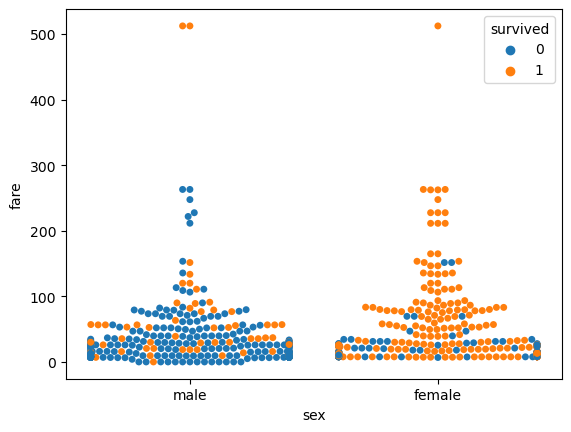

In [56]:
sns.swarmplot(y='fare', x = 'sex', hue='survived', data=df)
plt.show()

## Survived and Sibling

In [57]:
df.sibsp.value_counts()

sibsp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='sibsp'>

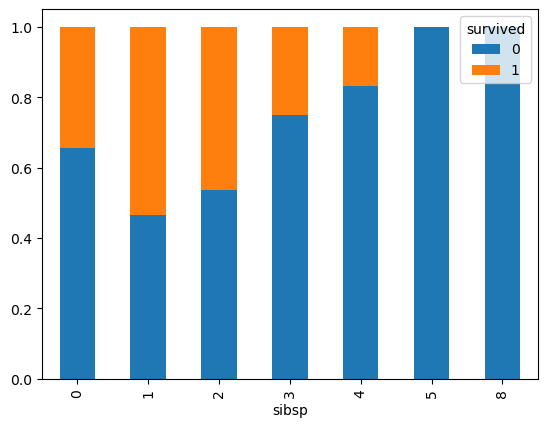

In [62]:
pd.crosstab(df.sibsp, df.survived, normalize = 'index').plot(kind='bar', stacked = True)

In [63]:
df[df.sibsp == 8]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,title
159,0,3,male,NaN,8,2,69.55,S,Master
180,0,3,female,NaN,8,2,69.55,S,Miss
201,0,3,male,NaN,8,2,69.55,S,Mr
324,0,3,male,NaN,8,2,69.55,S,Mr
792,0,3,female,NaN,8,2,69.55,S,Miss
846,0,3,male,NaN,8,2,69.55,S,Mr
863,0,3,female,NaN,8,2,69.55,S,Miss


## Survived and Embarked

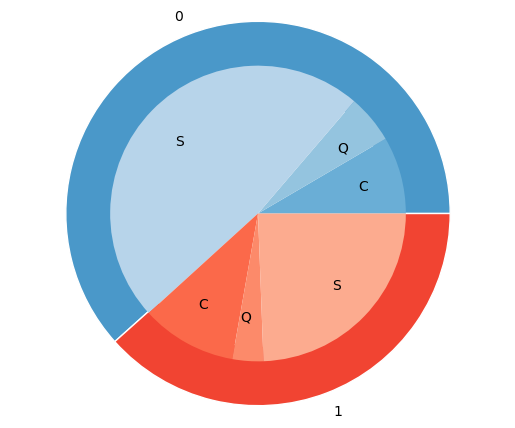

In [89]:
by_embarked = df.groupby('embarked').survived.value_counts().to_frame().reset_index().sort_values('survived')

group_names = df.survived.value_counts().index
group_size = df.survived.value_counts()
subgroup_name = by_embarked['embarked']
subgroup_size = by_embarked['count']

a, b, c = [plt.cm.Blues, plt.cm.Reds, plt.cm.Greens]

fig, ax = plt.subplots()
ax.axis('equal')
mypie, _ = ax.pie(group_size, radius = 1.3, labels = group_names, colors = [a(0.6), b(0.6)])
plt.setp(mypie, width = 0.3, edgecolor = 'white')

mypie2, _ = ax.pie(subgroup_size, radius = 1.3 - 0.3, labels = subgroup_name, labeldistance = 0.7, colors = [a(0.5), a(0.4), a(0.3), b(0.5), b(0.4), b(0.3)])
plt.setp(mypie, width = 0.4, edgecolor = 'white')
plt.margins(0,0)

In [91]:
pd.crosstab(df.embarked, df.survived, normalize = 'columns')

survived,0,1
embarked,,
C,0.136612,0.273529
Q,0.085610,0.088235
S,0.777778,0.638235


In [95]:
df[(df.embarked == 'S') & (df.survived == 1)]['pclass'].value_counts()

pclass
2    76
1    74
3    67
Name: count, dtype: int64

# Modeling

## Plan

Imputing:
 - Age = Mean
 - Embarked = 'S'
 
Encode:
 - sex, embarked = onehot
 - title = binary

## Split

In [134]:
rs = 2021

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
# from imblearn.pipeline import Pipeline
# from imblearn.over_sampling import RandomOverSampler, SMOTE
# from imblearn.under_sampling import RandomUnderSampler

from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score, roc_curve

In [135]:
X = df.drop('survived', axis = 1)
y = df.survived

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = rs)

In [136]:
numerical_pipeline = Pipeline([
    ('impute_num', SimpleImputer(strategy = 'mean'))
])

onehot_pipeline = Pipeline([
    ('impute_cat', SimpleImputer(strategy = 'constant', fill_value = 'S')),
    ('onehot', OneHotEncoder(drop = 'first'))
])

binary_pipeline = Pipeline([
    ('binary', ce.BinaryEncoder())
])

transformer = ColumnTransformer([
    ('impute_pipe', numerical_pipeline, ['age']),
    ('onehot_pipe', onehot_pipeline, ['sex', 'embarked']),
    ('binary_pipe', binary_pipeline, ['title'])
], remainder = 'passthrough')

dtc = DecisionTreeClassifier(max_depth = 5, random_state = rs)
rfe = RFE(estimator = dtc)

all_in_pipeline = Pipeline([
    ('transformer', transformer),
    ('rfe', rfe),
    ('clf', dtc)
])

In [137]:
all_in_pipeline.get_params()

{'memory': None,
 'steps': [('transformer',
   ColumnTransformer(remainder='passthrough',
                     transformers=[('impute_pipe',
                                    Pipeline(steps=[('impute_num',
                                                     SimpleImputer())]),
                                    ['age']),
                                   ('onehot_pipe',
                                    Pipeline(steps=[('impute_cat',
                                                     SimpleImputer(fill_value='S',
                                                                   strategy='constant')),
                                                    ('onehot',
                                                     OneHotEncoder(drop='first'))]),
                                    ['sex', 'embarked']),
                                   ('binary_pipe',
                                    Pipeline(steps=[('binary', BinaryEncoder())]),
                                    ['titl

In [145]:
hyperparam_space = {
    'clf__max_depth': [2,3,4,5,6,7],
    'clf__min_samples_split': [4,5,6,7,8,9,10],
    'clf__criterion': ['entropy', 'gini'],
    'rfe__n_features_to_select': [None,5,6,7,8]
}

skf = StratifiedKFold(n_splits = 5)

gridsearch = GridSearchCV(all_in_pipeline, hyperparam_space, scoring = 'f1', n_jobs= -1, cv = skf)
gridsearch.fit(X_train_val, y_train_val)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('impute_pipe',
                                                                         Pipeline(steps=[('impute_num',
                                                                                          SimpleImputer())]),
                                                                         ['age']),
                                                                        ('onehot_pipe',
                                                                         Pipeline(steps=[('impute_cat',
                                                                                          SimpleImputer(fill_value='S',
                                                                                                        strategy='constant')),
                                                                                         ('onehot...
                                                                                          BinaryEncoder())]),
                                                                         ['title'])])),
                                       ('rfe',
                                        RFE(estimator=DecisionTreeClassifier(max_depth=5,
                                                                             random_state=2021))),
                                       ('clf',
                                        DecisionTreeClassifier(max_depth=5,
                                                               random_state=2021))]),
             n_jobs=-1,
             param_grid={'clf__criterion': ['entropy', 'gini'],
                         'clf__max_depth': [2, 3, 4, 5, 6, 7],
                         'clf__min_samples_split': [4, 5, 6, 7, 8, 9, 10],
                         'rfe__n_features_to_select': [None, 5, 6, 7, 8]},
             scoring='f1')

In [146]:
gridsearch.best_params_

{'clf__criterion': 'gini',
 'clf__max_depth': 6,
 'clf__min_samples_split': 9,
 'rfe__n_features_to_select': 7}

In [140]:
model_default = all_in_pipeline.fit(X_train_val, y_train_val)
y_pred_default = model_default.predict(X_test)

print(classification_report(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       110
           1       0.80      0.70      0.74        69

    accuracy                           0.82       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179



In [141]:
gridsearch.best_estimator_

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('impute_pipe',
                                                  Pipeline(steps=[('impute_num',
                                                                   SimpleImputer())]),
                                                  ['age']),
                                                 ('onehot_pipe',
                                                  Pipeline(steps=[('impute_cat',
                                                                   SimpleImputer(fill_value='S',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder(drop='first'))]),
                                                  ['sex', 'embarked']),
                                                 ('binary_pipe',
                                                  Pipeline(steps=[('binary',
                                                                   BinaryEncoder())]),
                                                  ['title'])])),
                ('rfe',
                 RFE(estimator=DecisionTreeClassifier(max_depth=5,
                                                      random_state=2021),
                     n_features_to_select=6)),
                ('clf',
                 DecisionTreeClassifier(max_depth=6, min_samples_split=5,
                                        random_state=2021))])

In [147]:
model_tune= gridsearch.best_estimator_.fit(X_train_val, y_train_val)
y_pred_tune = model_tune.predict(X_test)

print(classification_report(y_test, y_pred_tune))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       110
           1       0.83      0.70      0.76        69

    accuracy                           0.83       179
   macro avg       0.83      0.80      0.81       179
weighted avg       0.83      0.83      0.82       179



In [129]:
X_train_val.head()

,pclass,sex,age,sibsp,parch,fare,embarked,title
3,1,female,35.0,1,0,53.10,S,Mrs
517,3,male,NaN,0,0,24.15,Q,Mr
861,2,male,21.0,1,0,11.50,S,Mr
487,1,male,58.0,0,0,29.70,C,Mr
58,2,female,5.0,1,2,27.75,S,Miss


In [130]:
df[df.pclass == 1].fare.mean()

84.1546875

In [148]:
    #pclass, sex, age, sib, parch, fare, embarked, title
rose = [[1, 'female', 17, 1,1, 85, np.nan, 'Miss']]
model_tune.predict(pd.DataFrame(rose, columns = X_train_val.columns))

array([1], dtype=int64)

In [149]:
jack = [[3, 'male', 20, 0, 0, 0, 'S', 'Mr']]
model_tune.predict(pd.DataFrame(jack, columns = X_train_val.columns))

array([1], dtype=int64)